In [12]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from rouge_score import rouge_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import ast
from bs4 import BeautifulSoup
import contractions
import re
import swifter
import warnings
warnings.filterwarnings("ignore")

In [13]:
def k_words(processed_documents, k=10):
    exclude_chars = {"'", ',', ' '}
    all_words = [word for sublist in processed_documents for word in sublist if word not in exclude_chars]
    word_freq = Counter(all_words)
    top_words = [word for word, _ in word_freq.most_common(k)] 
    return top_words

In [14]:
def evaluate_relevance(summary, topic_keywords):
    relevance_score = 0
    
    if isinstance(summary, str):
        summary_lower = summary.lower()
    else:
        return relevance_score
    
    if isinstance(topic_keywords, list):
        for keyword in topic_keywords:
            if isinstance(keyword, str):
                if keyword.lower() in summary_lower:
                    relevance_score += 1
            else:
                continue
    if len(topic_keywords) > 0:
        normalized_relevance_score = relevance_score / len(topic_keywords)
    else:
        normalized_relevance_score = 0
    
    return normalized_relevance_score


def evaluate_summary(df_summary):
    
    relevance_scores = []
    for summary, topic_keywords in zip(df_summary['Summary'], df_summary['top']):
        relevance_score = evaluate_relevance(summary, topic_keywords)
        relevance_scores.append(relevance_score)
    df_summary['Relevance Score'] = relevance_scores
    
    return df_summary

In [15]:
def calculate_fluency_score(summary):
    # Check if summary is NaN
    if pd.isna(summary):
        return 0
    
    tokens = word_tokenize(summary)
    tagged_tokens = pos_tag(tokens)
    correct_tags = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS',
                    'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH',
                    'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
    correct_count = sum(1 for _, tag in tagged_tokens if tag in correct_tags)
    fluency_score = correct_count / len(tokens)
    return fluency_score


In [16]:
def avg(df, column_name):
    column = df[column_name]
    if len(column) == 0:
        return 0  
    total_score = sum(column)
    avg_score = total_score / len(column)
    return avg_score

In [17]:
TW1=pd.read_csv('T5.csv')
TW2=pd.read_csv('T6.csv')
TW3=pd.read_csv('T7.csv')
TW4=pd.read_csv('T8.csv')
TW5=pd.read_csv('T9.csv')
TW6=pd.read_csv('T10.csv')
TW7=pd.read_csv('T11.csv')
TW8=pd.read_csv('T12.csv')

In [18]:
S1=pd.read_csv('TWLSA5.csv')
S2=pd.read_csv('TWLSA6.csv')
S3=pd.read_csv('TWLSA7.csv')
S4=pd.read_csv('TWLSA8.csv')
S5=pd.read_csv('TWLSA9.csv')
S6=pd.read_csv('TWLSA10.csv')
S7=pd.read_csv('TWLSA11.csv')
S8=pd.read_csv('TWLSA12.csv')

In [19]:
TW1['topic_words'] = TW1['topic_words'].apply(ast.literal_eval)

In [20]:
TW2['topic_words'] = TW2['topic_words'].apply(ast.literal_eval)

In [21]:
TW3['topic_words'] = TW3['topic_words'].apply(ast.literal_eval)
TW4['topic_words'] = TW4['topic_words'].apply(ast.literal_eval)
TW5['topic_words'] = TW5['topic_words'].apply(ast.literal_eval)
TW6['topic_words'] = TW6['topic_words'].apply(ast.literal_eval)
TW7['topic_words'] = TW7['topic_words'].apply(ast.literal_eval)
TW8['topic_words'] = TW8['topic_words'].apply(ast.literal_eval)

In [22]:
dataframes = [S1, S2, S3, S4, S5, S6, S7, S8]
topic_word_dfs = [TW1, TW2, TW3, TW4, TW5, TW6, TW7, TW8]
for i, df in enumerate(dataframes):
    topic_word_df = topic_word_dfs[i]
    df['top'] = topic_word_df['topic_words'].swifter.apply(k_words)
    df = evaluate_summary(df)
    df['Fluency Score'] = df['Summary'].apply(calculate_fluency_score)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

In [23]:
fluency_scores = []
relevance_scores = []


for i, df in enumerate(dataframes):
    fluency = avg(df, 'Fluency Score')
    relevance = avg(df, 'Relevance Score')
    fluency_scores.append(fluency)
    relevance_scores.append(relevance)

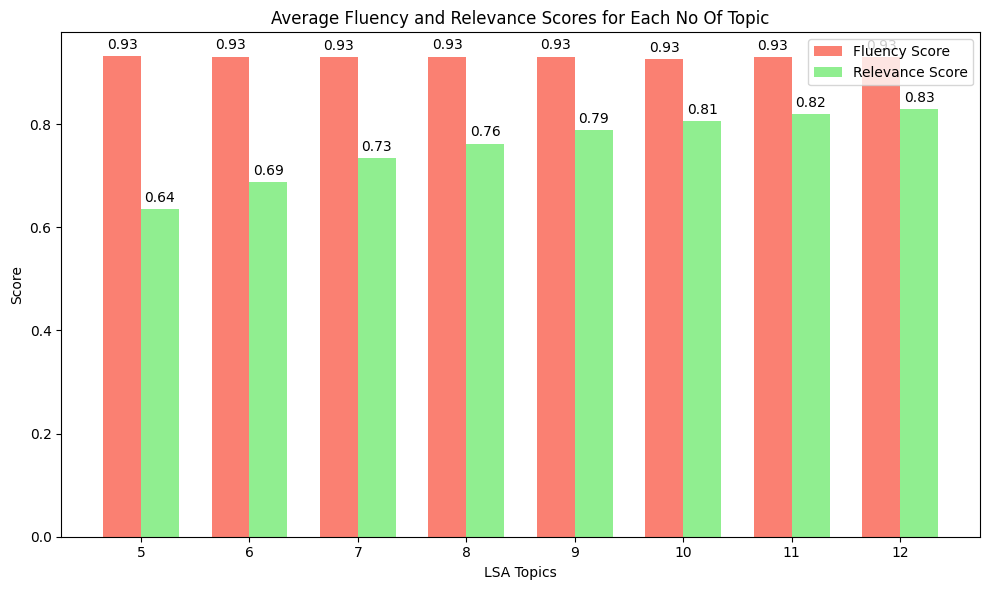

In [24]:
num_dataframes = len(dataframes)
indices = np.arange(num_dataframes)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
fluency_bars = ax.bar(indices - bar_width/2, fluency_scores, bar_width, label='Fluency Score', color='salmon')
relevance_bars = ax.bar(indices + bar_width/2, relevance_scores, bar_width, label='Relevance Score', color='lightgreen')

ax.set_xlabel('LSA Topics')
ax.set_ylabel('Score')
ax.set_title('Average Fluency and Relevance Scores for Each No Of Topic')
ax.set_xticks(indices)
ax.set_xticklabels([f"{i+5}" for i in range(num_dataframes)])
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fluency_bars)
autolabel(relevance_bars)
plt.tight_layout()
plt.show()

In [25]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()
        text = contractions.fix(text)
        text = re.sub(r'\\', '', text)
        tokens = word_tokenize(text.lower()) 
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]  
        tokens = [word for word in tokens if word not in stop_words]  
        return ' '.join(tokens)
    else:
        return ''

In [26]:
for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

In [27]:
S1['preprocessed_sentence'][0]

'stand actor change accent movie rarely effective howard show equally flat actor pretend hardened fisherman raspy voice year breathing salty air okay big video game buff wa game house dead really famous enough make movie sure went far actually put quick video game clip throughout movie though justifying particular scene violence dozen dozen game look exactly hand bottom screen supposedly holding whatever weapon kind alien walking dead sniper whatever case may interesting premise house dead lot college kid loaded college kid kid able pay fisherman something like ride miss boat trying get island supposed rave year least case fact way rave excuse way girl dressed look badly place running around wood cute little least thought dressed howard tellingly interesting character film far delivers absolutely awful performance greatness overshadows every actor movie first thing come mind house dead watching ha become increasingly clear modern horror movie become nothing exercise coming creative way

In [30]:
from textblob import TextBlob
def classify_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'postive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [37]:
for df in dataframes:
    df['TBLabel'] = df['preprocessed_sentence'].swifter.apply(classify_sentiment)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

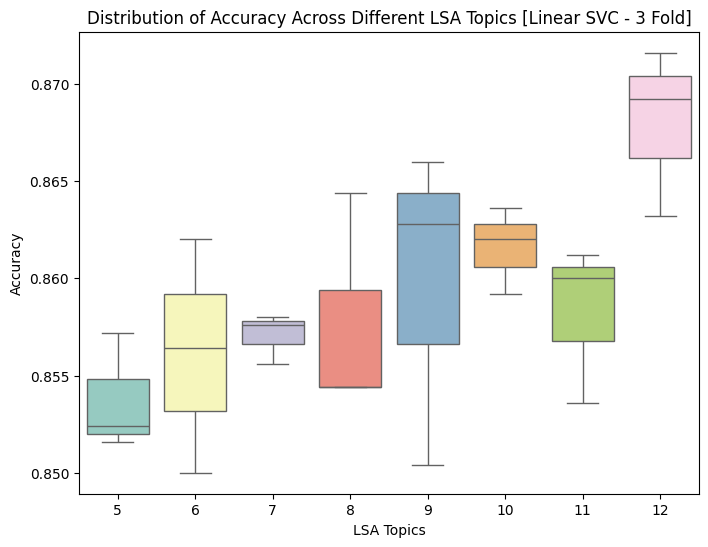

In [41]:
import seaborn as sns

accuracy = []
pipeline = make_pipeline(TfidfVectorizer(), LinearSVC())
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores)
    
mean_accuracy = [scores.mean() for scores in accuracy]  

plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy, palette='Set3')
plt.xlabel('LSA Topics')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [Linear SVC - 3 Fold]')
plt.xticks(range(len(dataframes)), [f'{i+5}' for i in range(len(dataframes))])
plt.show()

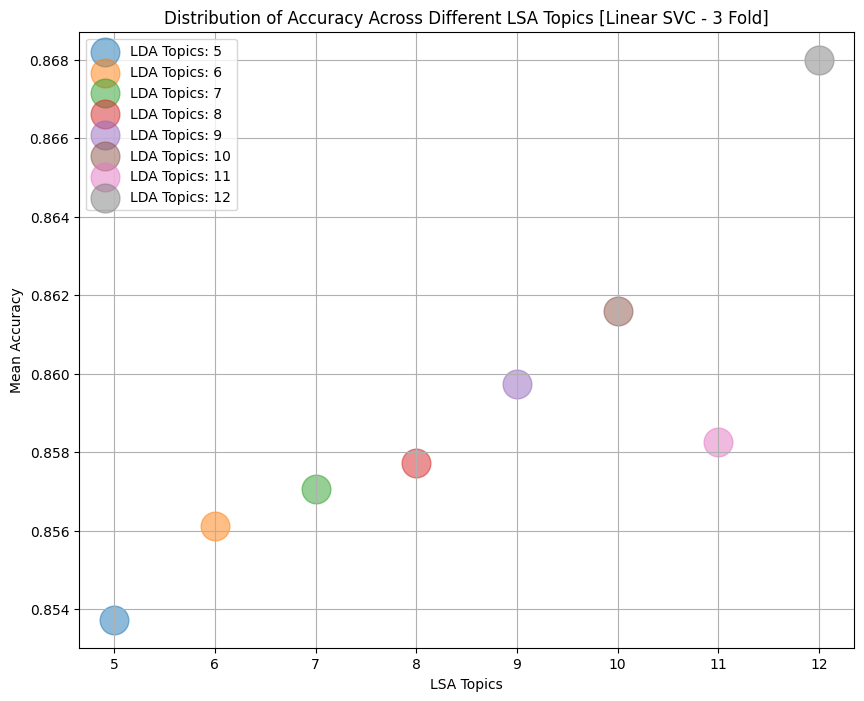

In [42]:
plt.figure(figsize=(10, 8))
for i, acc in enumerate(mean_accuracy):
    plt.scatter(i+5, acc, s=acc * 500, alpha=0.5, label=f'LDA Topics: {i+5}')

plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [Linear SVC - 3 Fold]')
plt.xticks(range(5, len(dataframes) + 5))
plt.legend()
plt.grid(True)
plt.show()

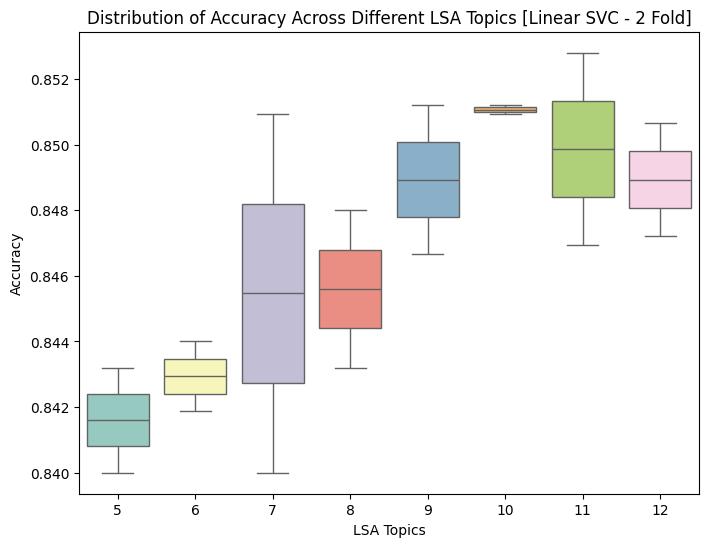

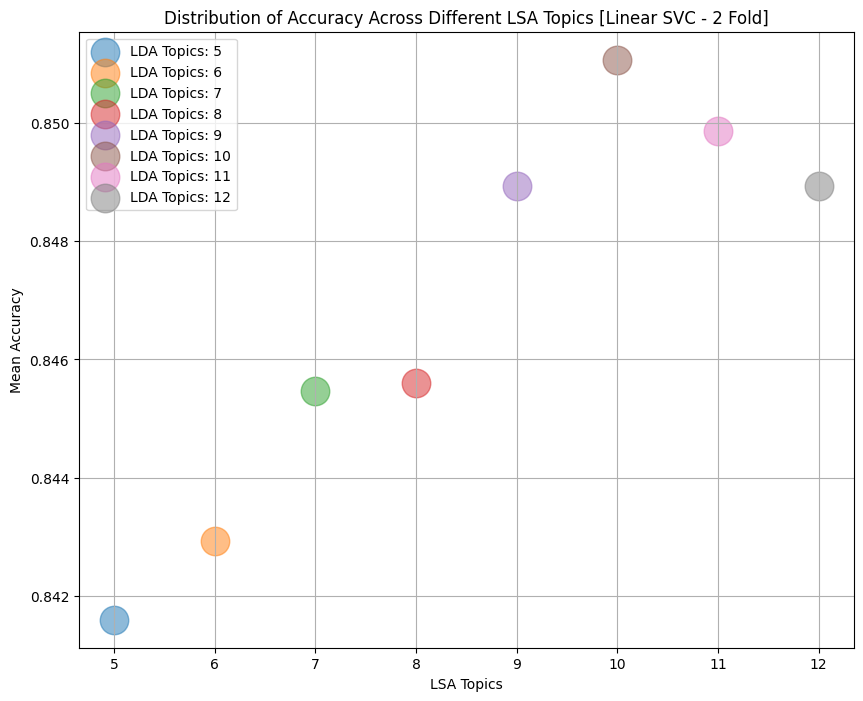

In [43]:
accuracy = []
pipeline = make_pipeline(TfidfVectorizer(), LinearSVC())
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores)
    
mean_accuracy = [scores.mean() for scores in accuracy]  

plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy, palette='Set3')
plt.xlabel('LSA Topics')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [Linear SVC - 2 Fold]')
plt.xticks(range(len(dataframes)), [f'{i+5}' for i in range(len(dataframes))])
plt.show()

plt.figure(figsize=(10, 8))
for i, acc in enumerate(mean_accuracy):
    plt.scatter(i+5, acc, s=acc * 500, alpha=0.5, label=f'LDA Topics: {i+5}')

plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [Linear SVC - 2 Fold]')
plt.xticks(range(5, len(dataframes) + 5))
plt.legend()
plt.grid(True)
plt.show()

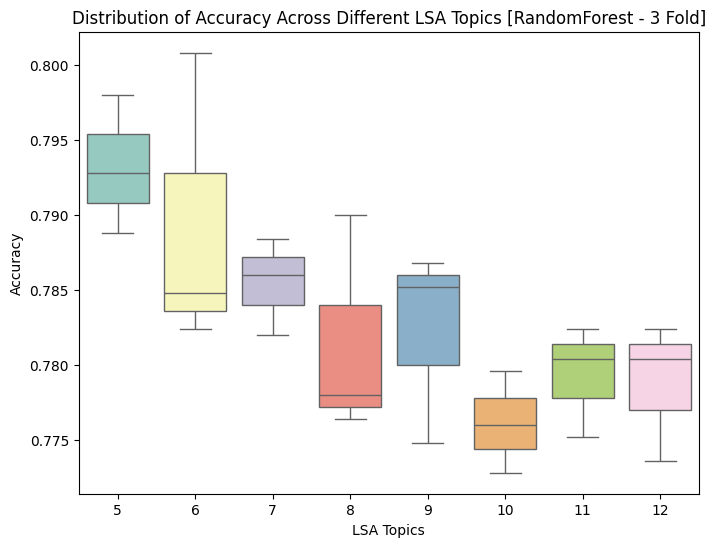

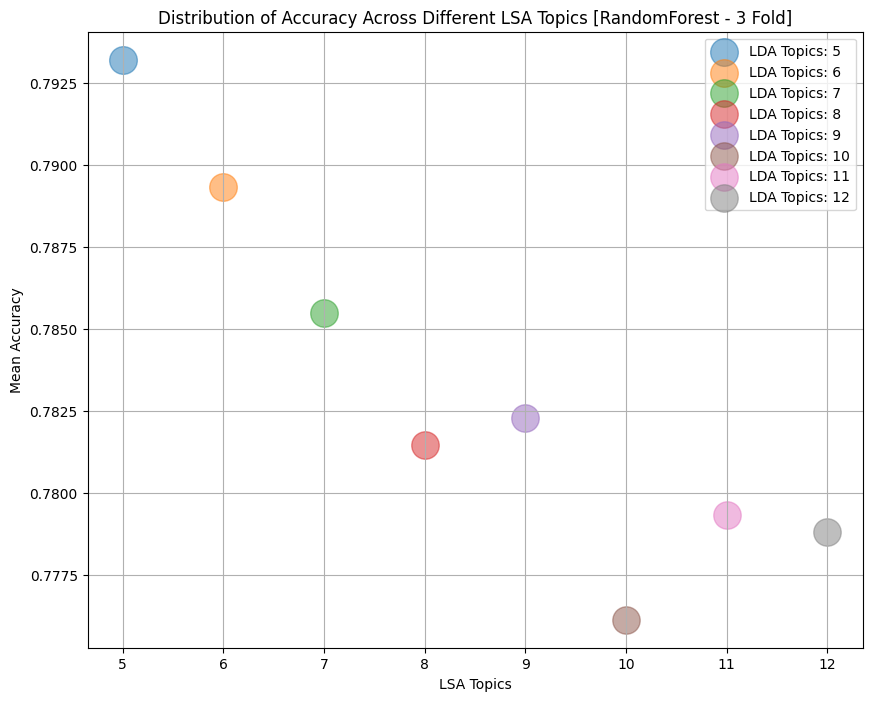

In [44]:
accuracy_rf = []

pipeline_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
cv_rf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for df in dataframes:
    cv_scores_rf = cross_val_score(pipeline_rf, df['preprocessed_sentence'], df['TBLabel'], cv=cv_rf)
    accuracy_rf.append(cv_scores_rf)
    
mean_accuracy_rf = [scores.mean() for scores in accuracy_rf]  

plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy_rf, palette='Set3')
plt.xlabel('LSA Topics')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [RandomForest - 3 Fold]')
plt.xticks(range(len(dataframes)), [f'{i+5}' for i in range(len(dataframes))])
plt.show()

plt.figure(figsize=(10, 8))
for i, acc in enumerate(mean_accuracy_rf):
    plt.scatter(i+5, acc, s=acc * 500, alpha=0.5, label=f'LDA Topics: {i+5}')

plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [RandomForest - 3 Fold]')
plt.xticks(range(5, len(dataframes) + 5))
plt.legend()
plt.grid(True)
plt.show()

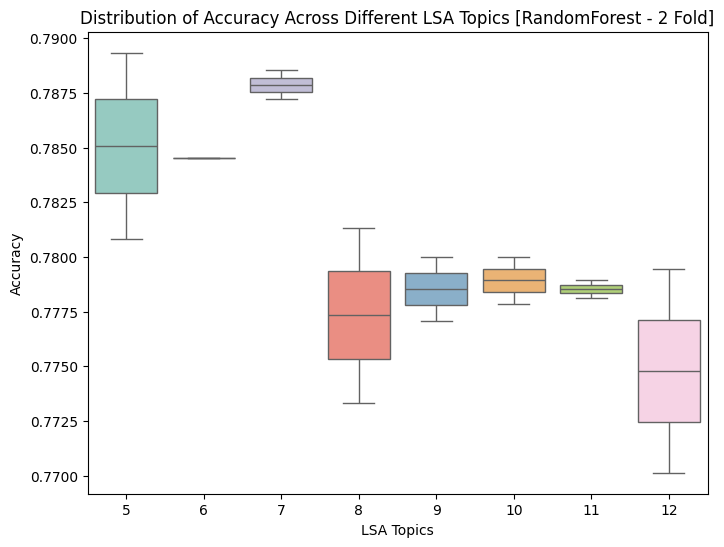

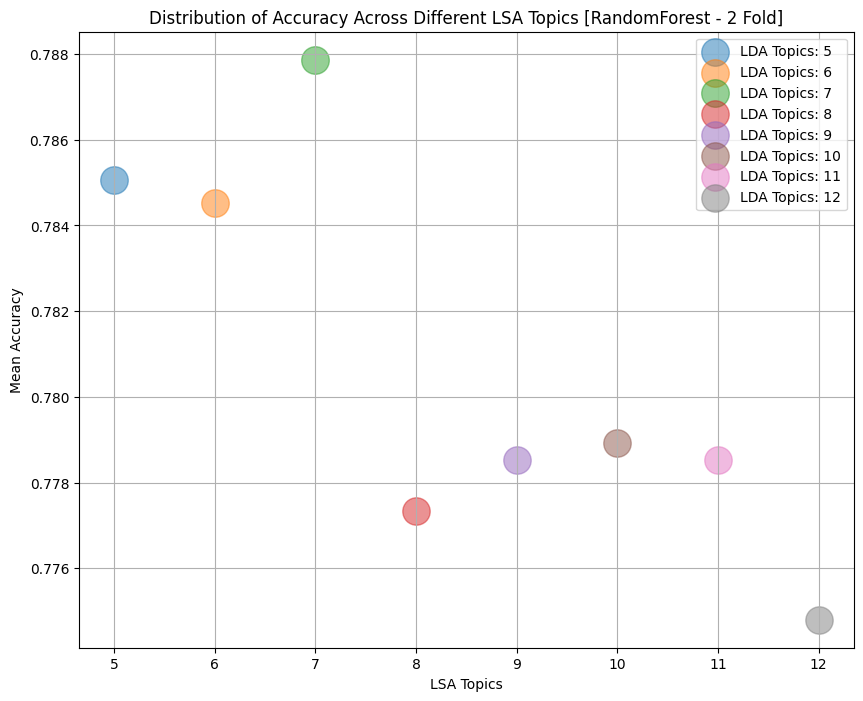

In [45]:
accuracy_rf = []

pipeline_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
cv_rf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for df in dataframes:
    cv_scores_rf = cross_val_score(pipeline_rf, df['preprocessed_sentence'], df['TBLabel'], cv=cv_rf)
    accuracy_rf.append(cv_scores_rf)
    
mean_accuracy_rf = [scores.mean() for scores in accuracy_rf]  

plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy_rf, palette='Set3')
plt.xlabel('LSA Topics')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [RandomForest - 2 Fold]')
plt.xticks(range(len(dataframes)), [f'{i+5}' for i in range(len(dataframes))])
plt.show()

plt.figure(figsize=(10, 8))
for i, acc in enumerate(mean_accuracy_rf):
    plt.scatter(i+5, acc, s=acc * 500, alpha=0.5, label=f'LDA Topics: {i+5}')

plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Distribution of Accuracy Across Different LSA Topics [RandomForest - 2 Fold]')
plt.xticks(range(5, len(dataframes) + 5))
plt.legend()
plt.grid(True)
plt.show()

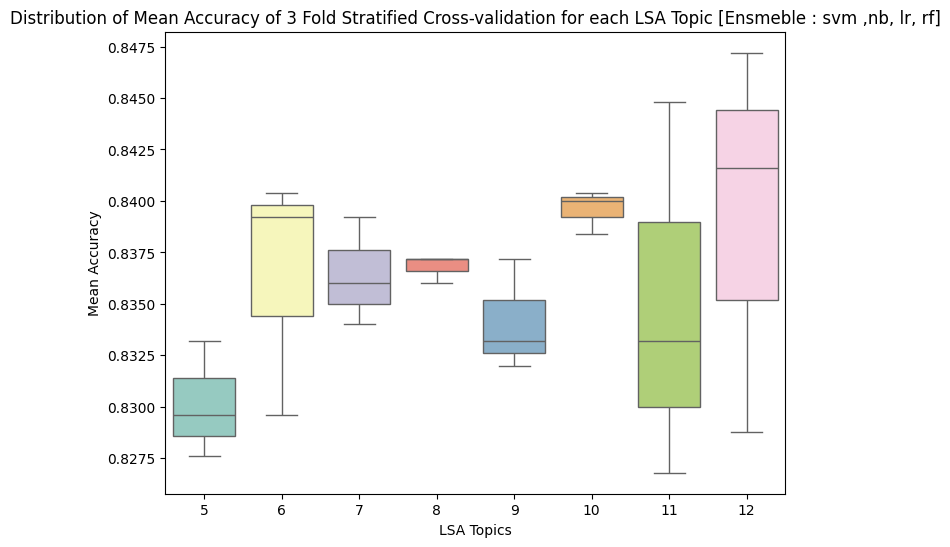

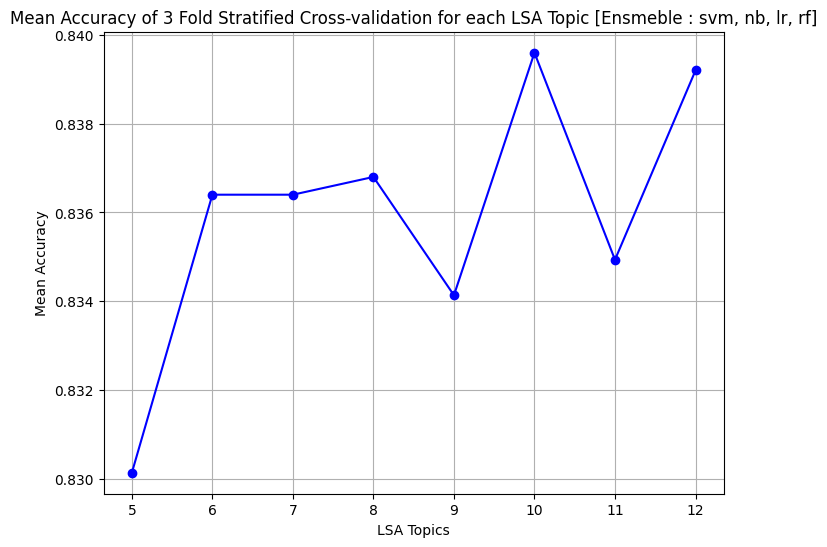

In [51]:
model1 = ('svm', LinearSVC())
model2 = ('nb', MultinomialNB())
model3 = ('lr', LogisticRegression())
model4 = ('rf', RandomForestClassifier())

ensemble_models = [model1, model2, model3, model4]
ensemble_classifier = VotingClassifier(estimators=ensemble_models, voting='hard')
pipeline = make_pipeline(TfidfVectorizer(), ensemble_classifier)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracy = []
for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores)
mean_accuracy = [scores.mean() for scores in accuracy]  

plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy, palette='Set3')
plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Distribution of Mean Accuracy of 3 Fold Stratified Cross-validation for each LSA Topic [Ensmeble : svm ,nb, lr, rf]')
plt.xticks(range(len(dataframes)), [f'{i+5}' for i in range(len(dataframes))])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(dataframes) + 1), mean_accuracy, marker='o', color='blue', linestyle='-')
plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 3 Fold Stratified Cross-validation for each LSA Topic [Ensmeble : svm, nb, lr, rf]')
plt.xticks(range(1, len(dataframes) + 1), [str(i) for i in range(5, 13)])
plt.grid(True)
plt.show()


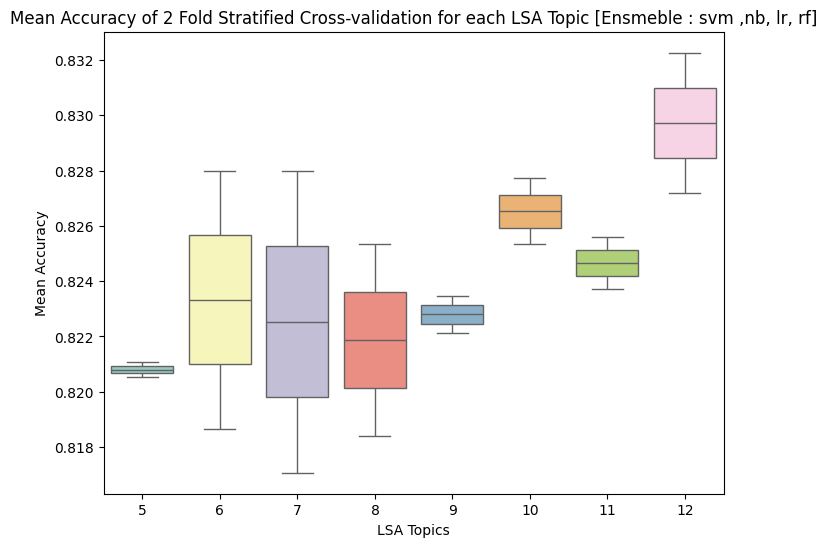

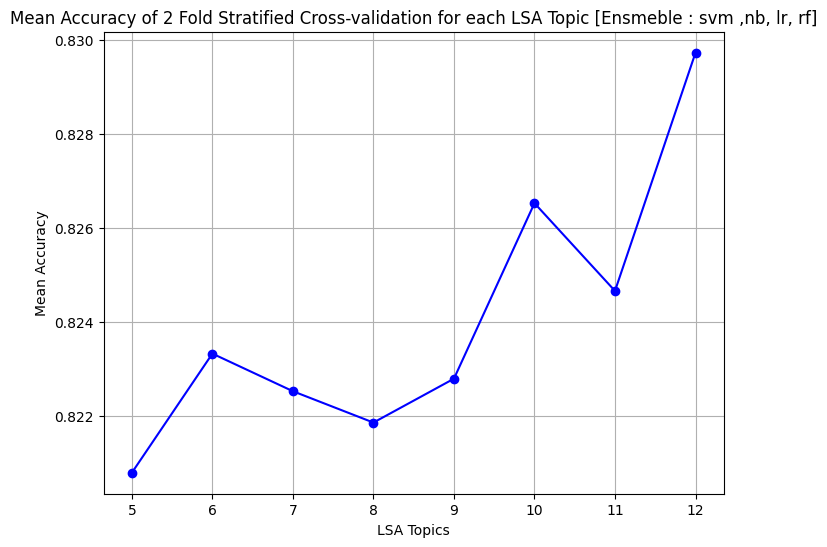

In [52]:
model1 = ('svm', LinearSVC())
model2 = ('nb', MultinomialNB())
model3 = ('lr', LogisticRegression())
model4 = ('rf', RandomForestClassifier())

ensemble_models = [model1, model2, model3, model4]
ensemble_classifier = VotingClassifier(estimators=ensemble_models, voting='hard')
pipeline = make_pipeline(TfidfVectorizer(), ensemble_classifier)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

accuracy = []
for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores)
mean_accuracy = [scores.mean() for scores in accuracy]  

plt.figure(figsize=(8, 6))
sns.boxplot(data=accuracy, palette='Set3')
plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 2 Fold Stratified Cross-validation for each LSA Topic [Ensmeble : svm ,nb, lr, rf]')
plt.xticks(range(len(dataframes)), [f'{i+5}' for i in range(len(dataframes))])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(dataframes) + 1), mean_accuracy, marker='o', color='blue', linestyle='-')
plt.xlabel('LSA Topics')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 2 Fold Stratified Cross-validation for each LSA Topic [Ensmeble : svm ,nb, lr, rf]')
plt.xticks(range(1, len(dataframes) + 1), [str(i) for i in range(5, 13)])
plt.grid(True)
plt.show()


In [53]:
from rouge_score import rouge_scorer

def calculate_rouge(reference_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    
    rouge1_score = [scores['rouge1'].precision, scores['rouge1'].recall, scores['rouge1'].fmeasure]
    rouge2_score = [scores['rouge2'].precision, scores['rouge2'].recall, scores['rouge2'].fmeasure]
    rougeL_score = [scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure]
    
    return rouge1_score, rouge2_score, rougeL_score

In [57]:
PR = pd.read_csv('PageRank.csv')
PR=PR.iloc[:7500]

In [58]:
avg_rouge_scores_list = []

for i in range(1, 9):
    print(i,end=' ')
    df_name = f"S{i}"
    df = globals()[df_name]      
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []
    
    for index, row in df.iterrows():
        reference_summary = str(PR.loc[index, 'Summary'])  
        generated_summary = str(row['Summary']) 
        
        rouge1_score, rouge2_score, rougeL_score = calculate_rouge(reference_summary, generated_summary)
        
        rouge1_scores.append(rouge1_score)
        rouge2_scores.append(rouge2_score)
        rougeL_scores.append(rougeL_score)
    
    
    avg_rouge1_precision = np.mean([score[0] for score in rouge1_scores])
    avg_rouge1_recall = np.mean([score[1] for score in rouge1_scores])
    avg_rouge1_fmeasure = np.mean([score[2] for score in rouge1_scores])
    
    avg_rouge2_precision = np.mean([score[0] for score in rouge2_scores])
    avg_rouge2_recall = np.mean([score[1] for score in rouge2_scores])
    avg_rouge2_fmeasure = np.mean([score[2] for score in rouge2_scores])
    
    avg_rougeL_precision = np.mean([score[0] for score in rougeL_scores])
    avg_rougeL_recall = np.mean([score[1] for score in rougeL_scores])
    avg_rougeL_fmeasure = np.mean([score[2] for score in rougeL_scores])
    
    avg_rouge_scores_list.append({
        'df_name': df_name,
        'avg_rouge1_precision': avg_rouge1_precision,
        'avg_rouge1_recall': avg_rouge1_recall,
        'avg_rouge1_fmeasure': avg_rouge1_fmeasure,
        'avg_rouge2_precision': avg_rouge2_precision,
        'avg_rouge2_recall': avg_rouge2_recall,
        'avg_rouge2_fmeasure': avg_rouge2_fmeasure,
        'avg_rougeL_precision': avg_rougeL_precision,
        'avg_rougeL_recall': avg_rougeL_recall,
        'avg_rougeL_fmeasure': avg_rougeL_fmeasure
    })

for avg_rouge_scores in avg_rouge_scores_list:
    print("Average ROUGE-1 Precision, Recall, F-measure:", [avg_rouge_scores['avg_rouge1_precision'],
                                                            avg_rouge_scores['avg_rouge1_recall'],
                                                            avg_rouge_scores['avg_rouge1_fmeasure']])
    print("Average ROUGE-2 Precision, Recall, F-measure:", [avg_rouge_scores['avg_rouge2_precision'],
                                                            avg_rouge_scores['avg_rouge2_recall'],
                                                            avg_rouge_scores['avg_rouge2_fmeasure']])
    print("Average ROUGE-L Precision, Recall, F-measure:", [avg_rouge_scores['avg_rougeL_precision'],
                                                            avg_rouge_scores['avg_rougeL_recall'],
                                                            avg_rouge_scores['avg_rougeL_fmeasure']])
    print()


1 2 3 4 5 6 7 8 Average ROUGE-1 Precision, Recall, F-measure: [0.5343826232890213, 0.5569678030488894, 0.5248663737692792]
Average ROUGE-2 Precision, Recall, F-measure: [0.38151802544149505, 0.41294793203653096, 0.38252292941517757]
Average ROUGE-L Precision, Recall, F-measure: [0.38325597857182936, 0.4014987196270042, 0.37696014130346656]

Average ROUGE-1 Precision, Recall, F-measure: [0.5234022904889873, 0.6146261284917021, 0.5458442977304312]
Average ROUGE-2 Precision, Recall, F-measure: [0.38505335928617973, 0.46401412978504947, 0.4069514001105301]
Average ROUGE-L Precision, Recall, F-measure: [0.38071116423570495, 0.449132766123649, 0.3975439017512506]

Average ROUGE-1 Precision, Recall, F-measure: [0.5122259243092452, 0.6639037462838988, 0.5597093894743502]
Average ROUGE-2 Precision, Recall, F-measure: [0.3864832918073587, 0.5099281482998794, 0.42614413951329505]
Average ROUGE-L Precision, Recall, F-measure: [0.3778540318837607, 0.4910235684304929, 0.41308461003822083]

Average R

In [59]:
avg_rouge1_precision_list = []
avg_rouge1_recall_list = []
avg_rouge1_fmeasure_list = []
avg_rouge2_precision_list = []
avg_rouge2_recall_list = []
avg_rouge2_fmeasure_list = []
avg_rougeL_precision_list = []
avg_rougeL_recall_list = []
avg_rougeL_fmeasure_list = []

for avg_rouge_scores in avg_rouge_scores_list:
    avg_rouge1_precision_list.append(avg_rouge_scores['avg_rouge1_precision'])
    avg_rouge1_recall_list.append(avg_rouge_scores['avg_rouge1_recall'])
    avg_rouge1_fmeasure_list.append(avg_rouge_scores['avg_rouge1_fmeasure'])
    avg_rouge2_precision_list.append(avg_rouge_scores['avg_rouge2_precision'])
    avg_rouge2_recall_list.append(avg_rouge_scores['avg_rouge2_recall'])
    avg_rouge2_fmeasure_list.append(avg_rouge_scores['avg_rouge2_fmeasure'])
    avg_rougeL_precision_list.append(avg_rouge_scores['avg_rougeL_precision'])
    avg_rougeL_recall_list.append(avg_rouge_scores['avg_rougeL_recall'])
    avg_rougeL_fmeasure_list.append(avg_rouge_scores['avg_rougeL_fmeasure'])


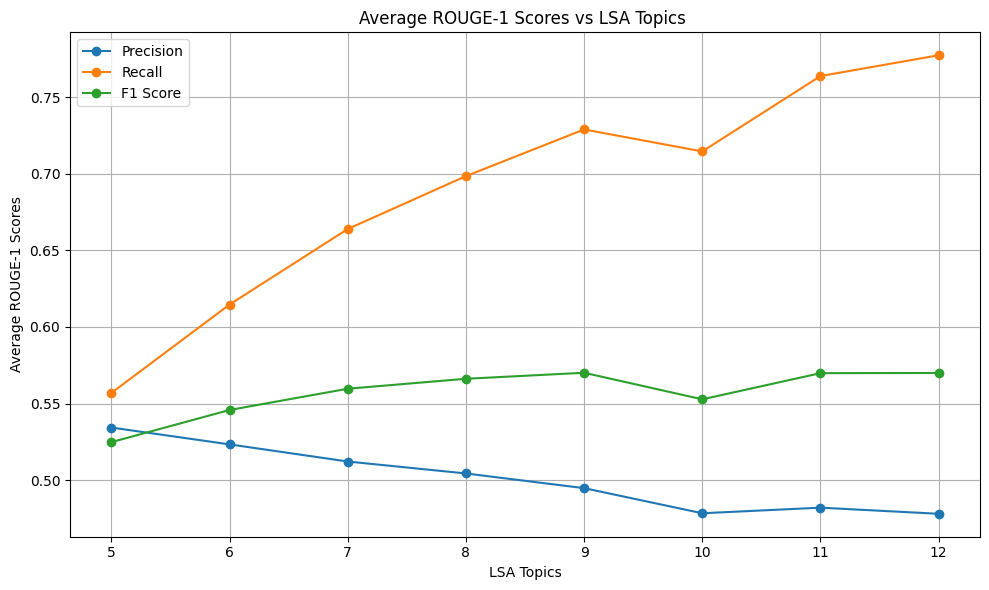

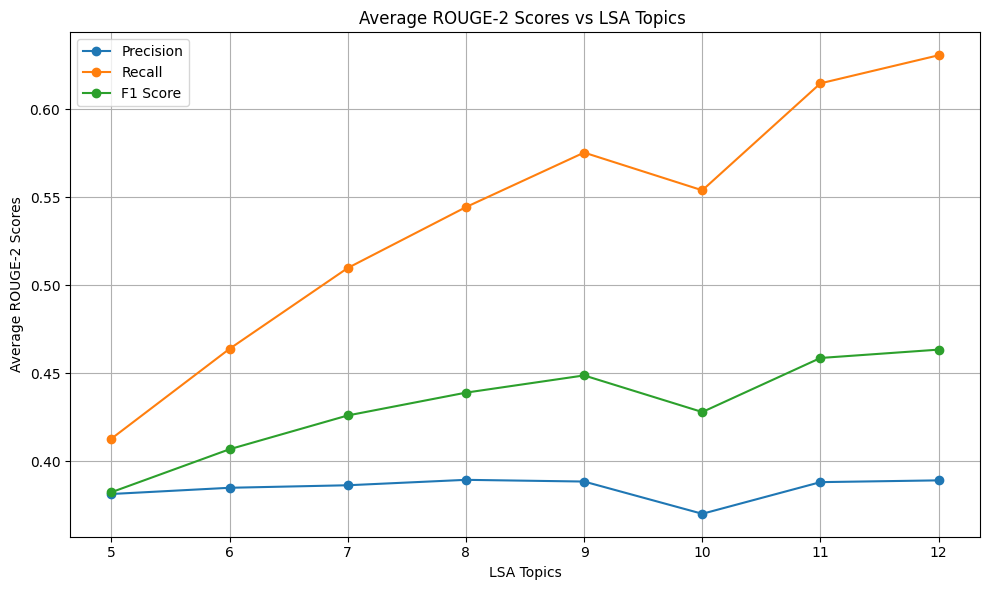

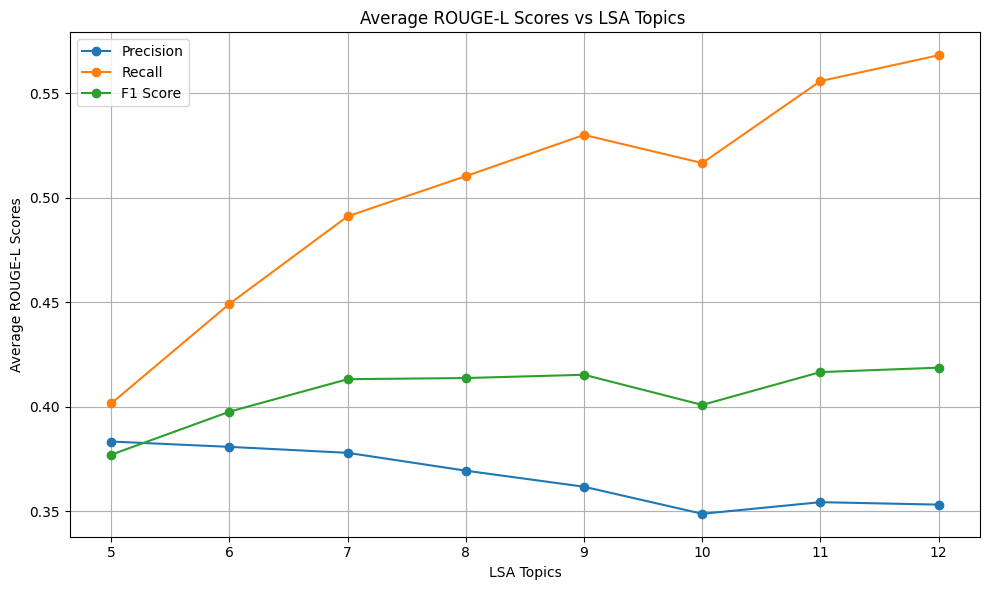

In [60]:
import matplotlib.pyplot as plt

configurations = [5,6,7,8,9,10,11,12]
def plot_rouge_metric(metric_list, metric_name):
    plt.figure(figsize=(10, 6))
    for metric_values in metric_list:
        plt.plot(configurations, metric_values, marker='o')
    plt.title(f'Average {metric_name} Scores vs LSA Topics ')
    plt.xlabel('LSA Topics')
    plt.ylabel(f'Average {metric_name} Scores')
    plt.legend(['Precision', 'Recall', 'F1 Score'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_rouge_metric([avg_rouge1_precision_list, avg_rouge1_recall_list, avg_rouge1_fmeasure_list], "ROUGE-1")

plot_rouge_metric([avg_rouge2_precision_list, avg_rouge2_recall_list, avg_rouge2_fmeasure_list], "ROUGE-2")

plot_rouge_metric([avg_rougeL_precision_list, avg_rougeL_recall_list, avg_rougeL_fmeasure_list], "ROUGE-L")
